<a href="https://colab.research.google.com/github/alexc6h6/Classification-Model/blob/master/Titanic_Survived.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier


In [27]:
!ls '/content/drive/My Drive/titanic'

gender_submission.csv  test.csv  train.csv


In [0]:
#import dataset
train = pd.read_csv('/content/drive/My Drive/titanic/train.csv', index_col = 'PassengerId')
test = pd.read_csv('/content/drive/My Drive/titanic/test.csv', index_col = 'PassengerId')

In [29]:
label = train['Survived'].values.reshape(-1, 1)

label.shape

(891, 1)

In [0]:
data = pd.concat([train, test], axis = 0, sort = False)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [0]:
#fill the missing value
data['Age'] = data['Age'].fillna(value = data['Age'].mean())  #fill missing value by mean
data['Fare'] = data['Fare'].fillna(value = data['Fare'].median())  #fill missing value by median
data['Embarked'] = data['Embarked'].fillna(value = data['Embarked'].mode()[0])  #fillmissing value by mode

In [0]:
data['Families'] = data['SibSp'] + data['Parch'] + 1  #add new families columns

In [34]:
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand = False)  #add new title columns

data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Mme           1
Don           1
Capt          1
Sir           1
Lady          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [35]:
data['Title'] = data['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
data['Title'] = data['Title'].replace('Lady', 'Mrs')
data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Don', 'Sir', 'Capt', 'Dona', 'Countess', 'Jonkheer'], 'Rare')

data['Title'].value_counts()

Mr        757
Miss      265
Mrs       198
Master     61
Rare       28
Name: Title, dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
 11  Families  1309 non-null   int64  
 12  Title     1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [37]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Families,Title
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [0]:
#change the data type of some features
data['Pclass'] = data['Pclass'].astype('object')
data['Age'] = data['Age'].astype('int64')

In [0]:
#visualize the data
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Title']
numeric_cols = ['Age', 'Fare','Parch','SibSp', 'Families']

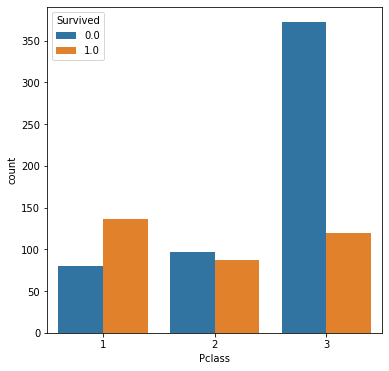

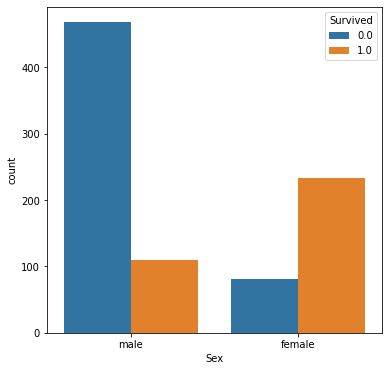

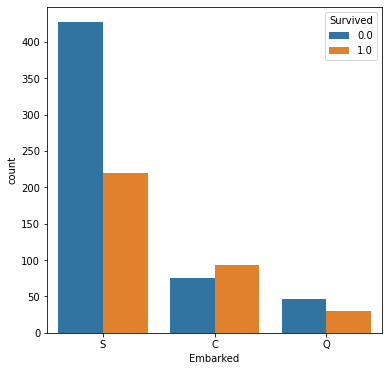

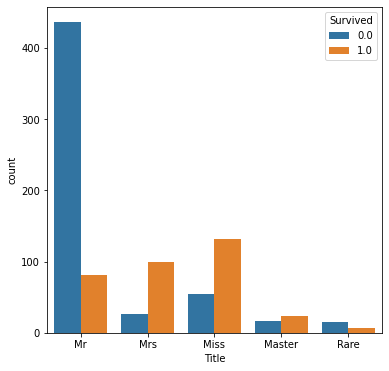

In [40]:
def cat_feature(cols, data):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    fig.gca()
    sns.countplot(x = col, data = data, hue = data['Survived'])
    plt.show()

cat_feature(categorical_cols, data)

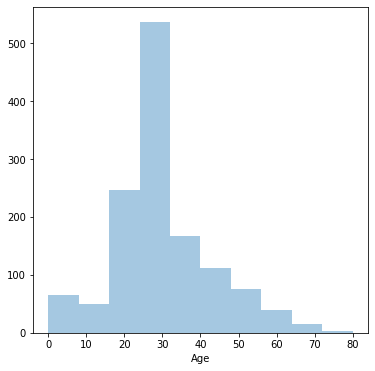

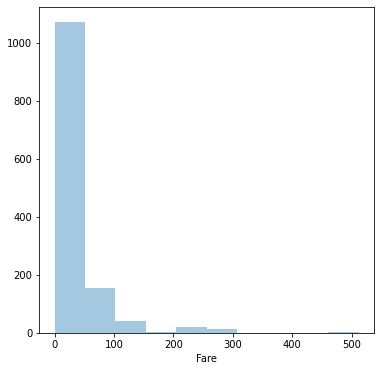

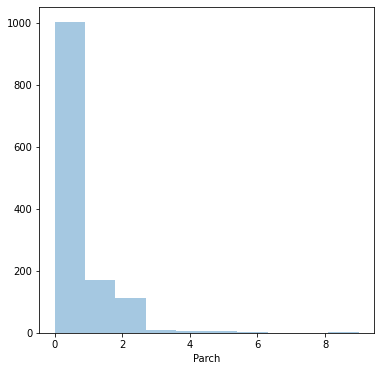

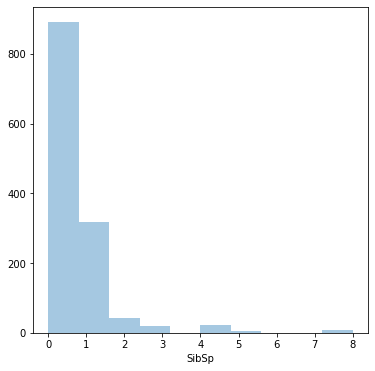

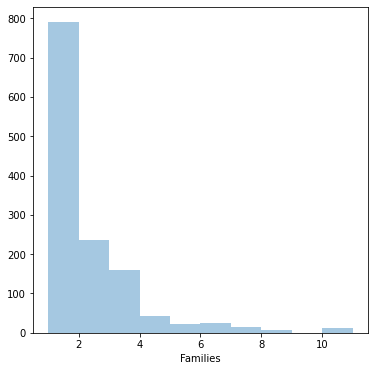

In [41]:
def num_feature(cols, data):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    fig.gca()
    sns.distplot(data[col], bins = 10, kde = False, )
    plt.show()

num_feature(numeric_cols, data)

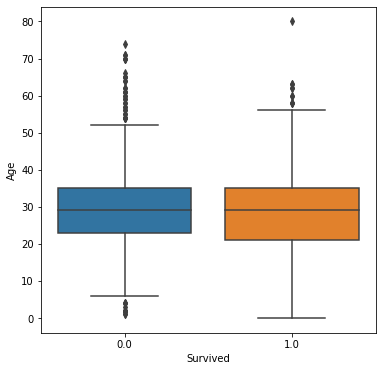

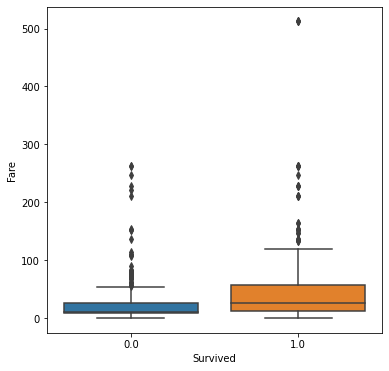

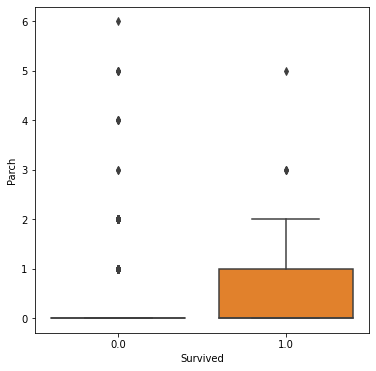

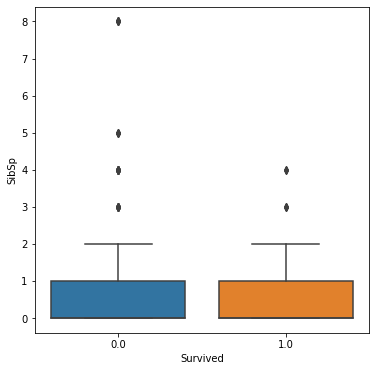

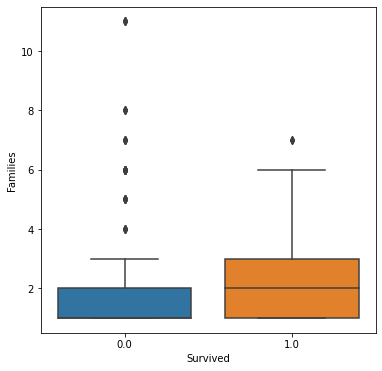

In [42]:
def rela_num_label(data, cols, label):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    fig.gca()
    sns.boxplot(x = label, y = col, data = data)
    plt.show()

rela_num_label(data, numeric_cols, data['Survived'])

In [0]:
data.drop(columns = ['Name', 'Ticket', 'Cabin', 'Survived'], inplace = True)  #drop the columns with too many missing value and useless

In [0]:
#transform categorical features into one hot code
data = pd.get_dummies(data)


In [45]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1309 non-null   int64  
 1   SibSp         1309 non-null   int64  
 2   Parch         1309 non-null   int64  
 3   Fare          1309 non-null   float64
 4   Families      1309 non-null   int64  
 5   Pclass_1      1309 non-null   uint8  
 6   Pclass_2      1309 non-null   uint8  
 7   Pclass_3      1309 non-null   uint8  
 8   Sex_female    1309 non-null   uint8  
 9   Sex_male      1309 non-null   uint8  
 10  Embarked_C    1309 non-null   uint8  
 11  Embarked_Q    1309 non-null   uint8  
 12  Embarked_S    1309 non-null   uint8  
 13  Title_Master  1309 non-null   uint8  
 14  Title_Miss    1309 non-null   uint8  
 15  Title_Mr      1309 non-null   uint8  
 16  Title_Mrs     1309 non-null   uint8  
 17  Title_Rare    1309 non-null   uint8  
dtypes: float64(1), int64(4), uin

In [0]:
#split the dataset into training set and testing set
train_feature = data.iloc[:891]
test_feature = data.iloc[891:]

In [0]:
#standardize the features
sc = StandardScaler()
sc.fit(train_feature)
train_feature = sc.transform(train_feature)
test_feature = sc.transform(test_feature)

In [48]:
#Logistic regression model
logistic = LogisticRegressionCV(Cs = [1.0, 3.0, 5.0, 10.0], penalty = 'l2', cv = 10)

logistic.fit(train_feature, label)

log_pred = logistic.predict(test_feature)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#support vector mechine 
svm = SVC(C = 1.0, kernel = 'rbf')

svm.fit(train_feature, label)

svm_pred = svm.predict(test_feature)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
#gaussian distribution
gaussian = GaussianProcessClassifier()

gaussian.fit(train_feature, label)

gaussian_pred = gaussian.predict(test_feature)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
#random forest
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 20)

forest.fit(train_feature, label)

forest_pred = forest.predict(test_feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau

In [0]:
#parameters
units = 128
batch = 32
epochs = 100


In [68]:
#generate the neural networks model
model = Sequential()

model.add(Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.1), input_shape = (18,)))

for i in range(0, 5):
  model.add(Dense(units, kernel_regularizer = regularizers.l2(0.1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)              

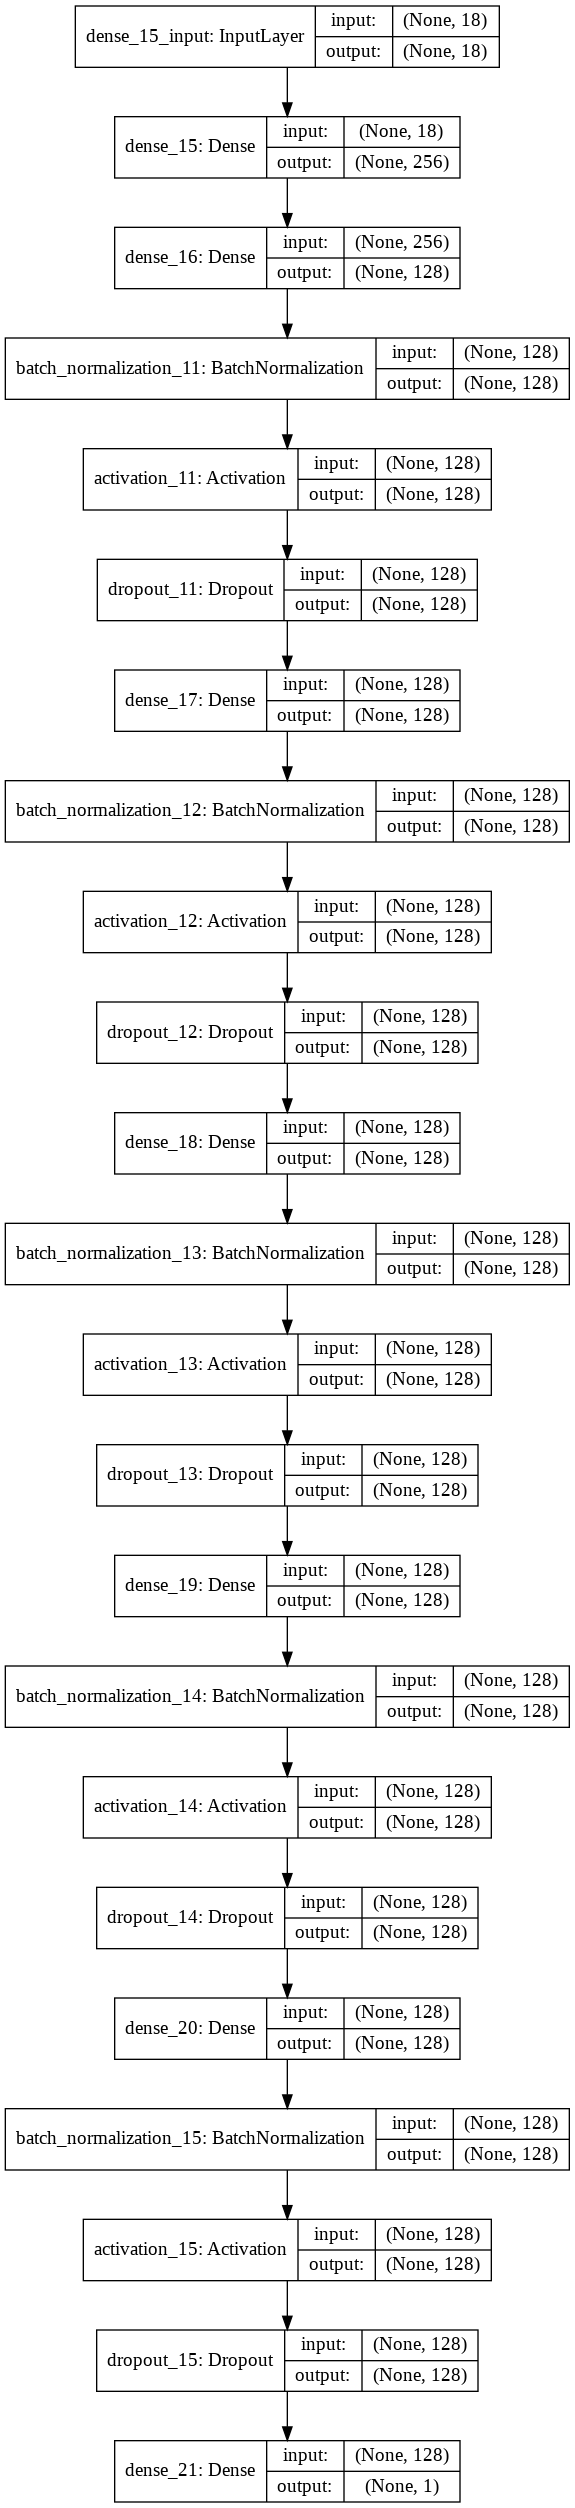

In [69]:
plot_model(model, show_shapes = True)

In [0]:
reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, verbose = 1, factor = 0.03, min_lr = 0)

In [72]:
#train the model
train_history = model.fit(train_feature, label, 
                          batch_size = batch, 
                          epochs = epochs, 
                          verbose = 1, 
                          validation_split = 0.1,
                          callbacks = [reduce_LR])

Train on 801 samples, validate on 90 samples
Epoch 1/100
801/801 [==============================] - 1s 2ms/step - loss: 59.8130 - acc: 0.6017 - val_loss: 46.6674 - val_acc: 0.6222
Epoch 2/100
801/801 [==============================] - 0s 493us/step - loss: 37.6646 - acc: 0.7765 - val_loss: 28.9109 - val_acc: 0.6222
Epoch 3/100
801/801 [==============================] - 0s 509us/step - loss: 23.1249 - acc: 0.7978 - val_loss: 17.7802 - val_acc: 0.6222
Epoch 4/100
801/801 [==============================] - 0s 516us/step - loss: 14.2488 - acc: 0.7903 - val_loss: 11.1086 - val_acc: 0.6222
Epoch 5/100
801/801 [==============================] - 0s 546us/step - loss: 8.8814 - acc: 0.8015 - val_loss: 7.1003 - val_acc: 0.6222
Epoch 6/100
801/801 [==============================] - 0s 572us/step - loss: 5.6668 - acc: 0.8177 - val_loss: 4.6829 - val_acc: 0.6222
Epoch 7/100
801/801 [==============================] - 0s 598us/step - loss: 3.7358 - acc: 0.7903 - val_loss: 3.2359 - val_acc: 0.6222
Epoc

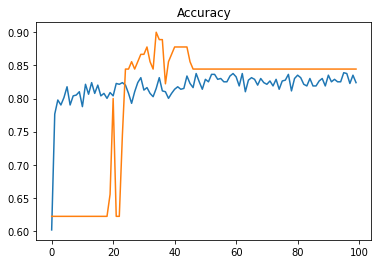

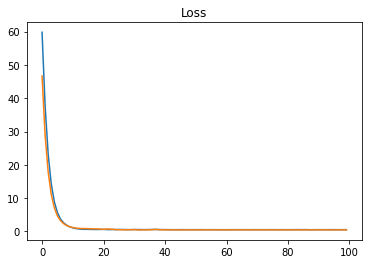

In [73]:
#plot the training history
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Accuracy')
plt.show()

plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Loss')
plt.show()